In [3]:
!pip install seaborn

     |████████████████████████████████| 215 kB 1.2 MB/s eta 0:00:01
  Using cached matplotlib-3.2.1-cp37-cp37m-macosx_10_9_x86_64.whl (12.4 MB)
  Using cached scipy-1.4.1-cp37-cp37m-macosx_10_6_intel.whl (28.4 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.2.0-cp37-cp37m-macosx_10_9_x86_64.whl (60 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)


In [139]:
!pip install missingno

  Using cached missingno-0.4.2-py3-none-any.whl (9.7 kB)


In [332]:
!pip install matplotlib -U

Requirement already up-to-date: matplotlib in ./venv-enem/lib/python3.7/site-packages (3.2.1)


In [31]:
!pip install ipympl

     |████████████████████████████████| 454 kB 1.3 MB/s eta 0:00:01
  Using cached ipywidgets-7.5.1-py2.py3-none-any.whl (121 kB)
  Using cached widgetsnbextension-3.5.1-py2.py3-none-any.whl (2.2 MB)
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.2.1
    Uninstalling widgetsnbextension-3.2.1:
      Successfully uninstalled widgetsnbextension-3.2.1
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.2.1
    Uninstalling ipywidgets-7.2.1:
      Successfully uninstalled ipywidgets-7.2.1


In [160]:
!pip install sklearn

Processing /Users/matheus/Library/Caches/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074/sklearn-0.0-py2.py3-none-any.whl
  Using cached scikit_learn-0.23.1-cp37-cp37m-macosx_10_9_x86_64.whl (7.2 MB)
  Using cached threadpoolctl-2.0.0-py3-none-any.whl (34 kB)
  Using cached joblib-0.15.1-py3-none-any.whl (298 kB)


In [134]:
!pip install ppscore

  Created wheel for ppscore: filename=ppscore-0.0.2-py2.py3-none-any.whl size=9629 sha256=b63b23b7c3a751b6500704024241d18402f9b16e1681b2728ccf3495fc543e40
  Stored in directory: /Users/matheus/Library/Caches/pip/wheels/bb/35/a9/b66dcda859b25d96509b26b47878164067f49ac1feb2a555ac
Successfully built ppscore


In [105]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas
import missingno as msno
import ppscore as pps
from sklearn.cluster import KMeans

In [3]:
#%matplotlib ipympl
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])

In [4]:
train = pd.read_csv('train.csv', index_col=0, float_precision = 32).iloc[:,1:] # Remover coluna com código de inscrição
print('Train Shape:', train.shape)

test = pd.read_csv('test.csv').iloc[:,1:] # Remover coluna com código de inscrição
print('Test Shape:', test.shape)

Train Shape: (13730, 165)
Test Shape: (4576, 46)


In [5]:
train.head()

NU_ANO  CO_MUNICIPIO_RESIDENCIA NO_MUNICIPIO_RESIDENCIA  CO_UF_RESIDENCIA  \
1    2016                  4314902            Porto Alegre                43   
2    2016                  2304707                  Granja                23   
3    2016                  2304400               Fortaleza                23   
4    2016                  3304557          Rio de Janeiro                33   
5    2016                  1302603                  Manaus                13   

  SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  \
1               RS        24       M              0.0            1   
2               CE        17       F              0.0            3   
3               CE        21       F              0.0            3   
4               RJ        25       F              0.0            0   
5               AM        28       M              0.0            2   

   TP_NACIONALIDADE  ...   Q041 Q042  Q043 Q044  Q045  Q046  Q047  Q048  Q049  \
1                 1  ...    5.0    A     A    A     A     A     A     A     B   
2                 1  ...    NaN    A     A    C     A     B     A     A     C   
3                 1  ...    NaN    A     A    A     A     C     A     A     B   
4                 1  ...    5.0    C     A    A     A     A     D     A     A   
5                 1  ...    NaN    A     A    A     A     A     A     A     A   

   Q050  
1     D  
2     A  
3     A  
4     A  
5     A  

[5 rows x 165 columns]

In [6]:
test.head()

CO_UF_RESIDENCIA SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_COR_RACA  \
0                41               PR        22       F            3   
1                21               MA        26       F            3   
2                23               CE        21       M            1   
3                15               PA        27       F            3   
4                41               PR        18       M            1   

   TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  TP_ENSINO  \
0                 1                1                5          1        NaN   
1                 1                1                8          1        NaN   
2                 1                2                0          2        3.0   
3                 1                1                8          1        NaN   
4                 1                2                0          2        1.0   

   ...   NU_NOTA_COMP5  NU_NOTA_REDACAO  Q001  Q002  Q006  Q024  Q025  Q026  \
0  ...            40.0            420.0     B     A     C     A     A     C   
1  ...           100.0            580.0     E     B     C     B     B     B   
2  ...            80.0            320.0     E     E     D     B     B     A   
3  ...             NaN              NaN     H     E     G     B     B     A   
4  ...             0.0            320.0     D     H     H     C     B     A   

   Q027  Q047  
0     C     A  
1     F     A  
2   NaN     A  
3   NaN     A  
4   NaN     A  

[5 rows x 46 columns]

### Columns from test missing in train

In [7]:
test.columns[
    ~test.columns.isin(train.columns)
    ]

Index([], dtype='object')

### Columns missing from train in test

In [8]:
missing = train.columns[
    ~train.columns.isin(test.columns)
    ]

print('# columns missing:', len(missing))

# columns missing: 119


### Selecting columns

In [9]:
# Columns to be used on model
colums_model = list(test.columns) + ['NU_NOTA_MT'] # add target columns missing from test set

# Select columns on train model
train = train[colums_model]

### Creating set with train and test data

In [10]:
data = pd.concat([
    train.assign(train = True),
    test.assign(train = False)
    ], sort = False)

print('Resulting Shape: ', data.shape)

Resulting Shape:  (18306, 48)


In [11]:
data.sample(10)

CO_UF_RESIDENCIA SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_COR_RACA  \
2147                33               RJ        19       F            3   
3786                29               BA        24       F            3   
1735                43               RS        24       F            1   
3762                33               RJ        21       F            3   
619                 22               PI        19       M            3   
2691                35               SP        18       F            3   
748                 31               MG        29       F            2   
3650                22               PI        19       M            3   
4544                16               AP        37       F            3   
1804                35               SP        24       F            3   

      TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  \
2147                 1                2                0          2   
3786                 1                1                5          1   
1735                 1                4                0          1   
3762                 1                1                3          1   
619                  1                1                1          1   
2691                 1                2                0          2   
748                  1                1                9          1   
3650                 1                2                0          2   
4544                 1                4                0          1   
1804                 1                1                6          1   

      TP_ENSINO  ...    Q001  Q002  Q006  Q024  Q025  Q026  Q027  Q047  \
2147        1.0  ...       E     E     C     B     B     A   NaN     A   
3786        NaN  ...       H     H     H     A     A     C     D     A   
1735        NaN  ...       E     B     F     B     B     C     G     A   
3762        NaN  ...       B     D     A     A     A     A   NaN     A   
619         NaN  ...       H     E     D     A     A     A   NaN     A   
2691        1.0  ...       B     C     D     B     B     A   NaN     A   
748         NaN  ...       A     B     C     A     A     A   NaN     A   
3650        1.0  ...       B     C     B     B     B     A   NaN     A   
4544        NaN  ...       C     A     B     A     A     B     M     A   
1804        NaN  ...       B     A     B     A     B     B     C     A   

      NU_NOTA_MT  train  
2147       480.6   True  
3786         NaN   True  
1735         NaN  False  
3762       550.7   True  
619          NaN   True  
2691       363.4   True  
748          NaN   True  
3650       386.9   True  
4544       424.3   True  
1804       643.2   True  

[10 rows x 48 columns]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18306 entries, 1 to 4575
Data columns (total 48 columns):
CO_UF_RESIDENCIA          18306 non-null int64
SG_UF_RESIDENCIA          18306 non-null object
NU_IDADE                  18306 non-null int64
TP_SEXO                   18306 non-null object
TP_COR_RACA               18306 non-null int64
TP_NACIONALIDADE          18306 non-null int64
TP_ST_CONCLUSAO           18306 non-null int64
TP_ANO_CONCLUIU           18306 non-null int64
TP_ESCOLA                 18306 non-null int64
TP_ENSINO                 5762 non-null float64
IN_TREINEIRO              18306 non-null int64
TP_DEPENDENCIA_ADM_ESC    5762 non-null float64
IN_BAIXA_VISAO            18306 non-null int64
IN_CEGUEIRA               18306 non-null int64
IN_SURDEZ                 18306 non-null int64
IN_DISLEXIA               18306 non-null int64
IN_DISCALCULIA            18306 non-null int64
IN_SABATISTA              18306 non-null int64
IN_GESTANTE               18306 non-null i

## Calculate some indicators on dataset

In [13]:
# Get stats
def get_stats(data):
    # Select numeric columns
    num = data.select_dtypes(['float64', 'int64', 'bool'])
    
    # Count mode value
    max_count = lambda col: col.value_counts().max()

    aux = pd.DataFrame(
        {
            'type': data.dtypes,
            'missing values': data.isnull().sum() / data.shape[0],
            '% most commom value': data.apply(max_count)/ data.shape[0],
            'mean': num.mean(),
            'median': num.median(),
            'max': num.max(),
            'min': num.min(),
            '# Unique Values': data.nunique(),
            'STD': num.std(),
            'Skew': num.skew(),
            'Kurtosis': num.kurtosis()

        },
        index = data.columns)
    
    return aux

### Whole data

In [14]:
get_stats(data \
          .dropna(subset=['NU_NOTA_LC'], axis = 0)
         )#.to_csv('aux.csv')

type  missing values  % most commom value  \
CO_UF_RESIDENCIA          int64        0.000000             0.151147   
SG_UF_RESIDENCIA         object        0.000000             0.151147   
NU_IDADE                  int64        0.000000             0.232050   
TP_SEXO                  object        0.000000             0.616210   
TP_COR_RACA               int64        0.000000             0.482754   
TP_NACIONALIDADE          int64        0.000000             0.956995   
TP_ST_CONCLUSAO           int64        0.000000             0.424796   
TP_ANO_CONCLUIU           int64        0.000000             0.575204   
TP_ESCOLA                 int64        0.000000             0.637972   
TP_ENSINO               float64        0.638046             0.337528   
IN_TREINEIRO              int64        0.000000             0.851369   
TP_DEPENDENCIA_ADM_ESC  float64        0.638046             0.297853   
IN_BAIXA_VISAO            int64        0.000000             0.999038   
IN_CEGUEIRA               int64        0.000000             1.000000   
IN_SURDEZ                 int64        0.000000             0.999704   
IN_DISLEXIA               int64        0.000000             0.999926   
IN_DISCALCULIA            int64        0.000000             0.999926   
IN_SABATISTA              int64        0.000000             0.989637   
IN_GESTANTE               int64        0.000000             0.999630   
IN_IDOSO                  int64        0.000000             0.999926   
TP_PRESENCA_CN            int64        0.000000             0.996077   
TP_PRESENCA_CH            int64        0.000000             0.996077   
TP_PRESENCA_LC            int64        0.000000             1.000000   
CO_PROVA_CN              object        0.000000             0.256847   
CO_PROVA_CH              object        0.000000             0.256847   
CO_PROVA_LC              object        0.000000             0.266247   
CO_PROVA_MT              object        0.000000             0.266247   
NU_NOTA_CN              float64        0.003923             0.001480   
NU_NOTA_CH              float64        0.003923             0.001110   
NU_NOTA_LC              float64        0.000000             0.001406   
TP_LINGUA                 int64        0.000000             0.582457   
TP_STATUS_REDACAO       float64        0.000000             0.976684   
NU_NOTA_COMP1           float64        0.000000             0.486973   
NU_NOTA_COMP2           float64        0.000000             0.434863   
NU_NOTA_COMP3           float64        0.000000             0.340118   
NU_NOTA_COMP4           float64        0.000000             0.416062   
NU_NOTA_COMP5           float64        0.000000             0.193856   
NU_NOTA_REDACAO         float64        0.000000             0.083272   
Q001                     object        0.000000             0.235677   
Q002                     object        0.000000             0.296965   
Q006                     object        0.000000             0.312287   
Q024                     object        0.000000             0.472909   
Q025                     object        0.000000             0.582161   
Q026                     object        0.000000             0.595707   
Q027                     object        0.606070             0.082235   
Q047                     object        0.000000             0.835529   
NU_NOTA_MT              float64        0.249963             0.000962   
train                      bool        0.000000             0.750037   

                              mean  median     max   min  # Unique Values  \
CO_UF_RESIDENCIA         30.583494    31.0    53.0  11.0               27   
SG_UF_RESIDENCIA               NaN     NaN     NaN   NaN               27   
NU_IDADE                 20.545226    18.0    66.0  13.0               54   
TP_SEXO                        NaN     NaN     NaN   NaN                2   
TP_COR_RACA               2.175944     3.0     5.0   0.0                6   
TP_NACIONALIDADE          1.048261  

### Train data

In [15]:
get_stats(data.query('train'))

type  missing values  % most commom value  \
CO_UF_RESIDENCIA          int64        0.000000             0.155717   
SG_UF_RESIDENCIA         object        0.000000             0.155717   
NU_IDADE                  int64        0.000000             0.191551   
TP_SEXO                  object        0.000000             0.618427   
TP_COR_RACA               int64        0.000000             0.487473   
TP_NACIONALIDADE          int64        0.000000             0.955645   
TP_ST_CONCLUSAO           int64        0.000000             0.475164   
TP_ANO_CONCLUIU           int64        0.000000             0.524836   
TP_ESCOLA                 int64        0.000000             0.688055   
TP_ENSINO               float64        0.688128             0.283030   
IN_TREINEIRO              int64        0.000000             0.870138   
TP_DEPENDENCIA_ADM_ESC  float64        0.688128             0.263001   
IN_BAIXA_VISAO            int64        0.000000             0.998762   
IN_CEGUEIRA               int64        0.000000             1.000000   
IN_SURDEZ                 int64        0.000000             0.999636   
IN_DISLEXIA               int64        0.000000             0.999927   
IN_DISCALCULIA            int64        0.000000             0.999927   
IN_SABATISTA              int64        0.000000             0.990313   
IN_GESTANTE               int64        0.000000             0.999053   
IN_IDOSO                  int64        0.000000             0.999854   
TP_PRESENCA_CN            int64        0.000000             0.753168   
TP_PRESENCA_CH            int64        0.000000             0.753168   
TP_PRESENCA_LC            int64        0.000000             0.738019   
CO_PROVA_CN              object        0.000000             0.246832   
CO_PROVA_CH              object        0.000000             0.246832   
CO_PROVA_LC              object        0.000000             0.261981   
CO_PROVA_MT              object        0.000000             0.261981   
NU_NOTA_CN              float64        0.246832             0.001238   
NU_NOTA_CH              float64        0.246832             0.001020   
NU_NOTA_LC              float64        0.261981             0.001238   
TP_LINGUA                 int64        0.000000             0.593664   
TP_STATUS_REDACAO       float64        0.261981             0.720466   
NU_NOTA_COMP1           float64        0.261981             0.360306   
NU_NOTA_COMP2           float64        0.261981             0.322505   
NU_NOTA_COMP3           float64        0.261981             0.253460   
NU_NOTA_COMP4           float64        0.261981             0.309395   
NU_NOTA_COMP5           float64        0.261981             0.144210   
NU_NOTA_REDACAO         float64        0.261981             0.062491   
Q001                     object        0.000000             0.241005   
Q002                     object        0.000000             0.282811   
Q006                     object        0.000000             0.310561   
Q024                     object        0.000000             0.469119   
Q025                     object        0.000000             0.569192   
Q026                     object        0.000000             0.525492   
Q027                     object        0.536999             0.092280   
Q047                     object        0.000000             0.854042   
NU_NOTA_MT              float64        0.261981             0.000947   
train                      bool        0.000000             1.000000   

                              mean  median     max   min  # Unique Values  \
CO_UF_RESIDENCIA         30.736708    31.0    53.0  11.0               27   
SG_UF_RESIDENCIA               NaN     NaN     NaN   NaN               27   
NU_IDADE                 21.593809    19.0    67.0  13.0               55   
TP_SEXO                        NaN     NaN     NaN   NaN                2   
TP_COR_RACA               2.185652     3.0     5.0   0.0                6   
TP_NACIONALIDADE          1.048871  

### Test Data

In [16]:
get_stats(data.query('~train'))

/Users/matheus/codenation/enem-2/venv-enem/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:907: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


type  missing values  % most commom value  \
CO_UF_RESIDENCIA          int64        0.000000             0.152535   
SG_UF_RESIDENCIA         object        0.000000             0.152535   
NU_IDADE                  int64        0.000000             0.195367   
TP_SEXO                  object        0.000000             0.604895   
TP_COR_RACA               int64        0.000000             0.477491   
TP_NACIONALIDADE          int64        0.000000             0.944930   
TP_ST_CONCLUSAO           int64        0.000000             0.465035   
TP_ANO_CONCLUIU           int64        0.000000             0.534965   
TP_ESCOLA                 int64        0.000000             0.676573   
TP_ENSINO               float64        0.676573             0.293269   
IN_TREINEIRO              int64        0.000000             0.872596   
TP_DEPENDENCIA_ADM_ESC  float64        0.676573             0.270323   
IN_BAIXA_VISAO            int64        0.000000             0.999126   
IN_CEGUEIRA               int64        0.000000             1.000000   
IN_SURDEZ                 int64        0.000000             0.999781   
IN_DISLEXIA               int64        0.000000             1.000000   
IN_DISCALCULIA            int64        0.000000             1.000000   
IN_SABATISTA              int64        0.000000             0.989729   
IN_GESTANTE               int64        0.000000             0.999563   
IN_IDOSO                  int64        0.000000             1.000000   
TP_PRESENCA_CN            int64        0.000000             0.752185   
TP_PRESENCA_CH            int64        0.000000             0.752185   
TP_PRESENCA_LC            int64        0.000000             0.737981   
CO_PROVA_CN              object        0.000000             0.247815   
CO_PROVA_CH              object        0.000000             0.247815   
CO_PROVA_LC              object        0.000000             0.262019   
CO_PROVA_MT              object        0.000000             0.262019   
NU_NOTA_CN              float64        0.247815             0.001967   
NU_NOTA_CH              float64        0.247815             0.001748   
NU_NOTA_LC              float64        0.262019             0.001530   
TP_LINGUA                 int64        0.000000             0.604458   
TP_STATUS_REDACAO       float64        0.262019             0.721809   
NU_NOTA_COMP1           float64        0.262019             0.356643   
NU_NOTA_COMP2           float64        0.262019             0.316215   
NU_NOTA_COMP3           float64        0.262019             0.243663   
NU_NOTA_COMP4           float64        0.262019             0.300044   
NU_NOTA_COMP5           float64        0.262019             0.143138   
NU_NOTA_REDACAO         float64        0.262019             0.060315   
Q001                     object        0.000000             0.248689   
Q002                     object        0.000000             0.284528   
Q006                     object        0.000000             0.316652   
Q024                     object        0.000000             0.468531   
Q025                     object        0.000000             0.577797   
Q026                     object        0.000000             0.533217   
Q027                     object        0.543706             0.090909   
Q047                     object        0.000000             0.855114   
NU_NOTA_MT              float64        1.000000                  NaN   
train                      bool        0.000000             1.000000   

                              mean  median    max   min  # Unique Values  \
CO_UF_RESIDENCIA         30.762019   31.00   53.0  11.0               27   
SG_UF_RESIDENCIA               NaN     NaN    NaN   NaN               27   
NU_IDADE                 21.542395   19.00   65.0  14.0               46   
TP_SEXO                        NaN     NaN    NaN   NaN                2   
TP_COR_RACA               2.181163    3.00    5.0   0.0                6   
TP_NACIONALIDADE          1.060970    1.00

### Insights
* **IN_CEGUEIRA** has only one value so its not useful
* **IN_DISLEXIA, IN_IDOSO, IN_DISCALCULIA** have only one value on the test set so they are not useful
* All the variables that start with **'IN_'** are actually booleans and hava extremely few true values with **less the 1%** of true values
* **TP_NACIONALIDADE** is 95% equal
* **'CO_UF_RESIDENCIA'** repeats **'SG_UF_RESIDENCIA'**

### Transformation

In [17]:
data.query('~train')['NU_NOTA_CH'].isnull().sum()

1134

In [18]:
drop_columns = ['IN_CEGUEIRA', 'IN_DISLEXIA', 'IN_IDOSO', 'IN_DISCALCULIA', 'CO_UF_RESIDENCIA']

data.drop(labels=drop_columns, axis = 1, inplace = True)

print('Data shape: ', data.shape)

Data shape:  (18306, 43)


In [19]:
drop_columns = ['IN_BAIXA_VISAO', 'IN_SURDEZ', 'IN_SABATISTA', 'IN_GESTANTE']

data.drop(labels=drop_columns, axis = 1, inplace = True)

print('Data shape: ', data.shape)

Data shape:  (18306, 39)


## Missing values

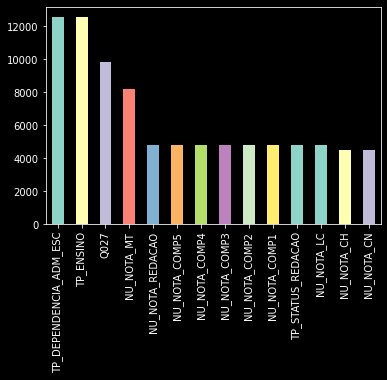

In [20]:
# Cols with missing values
col_with_null = data.columns[data.isnull().sum() > 0]

data[col_with_null].isnull().sum().sort_values(ascending = False).plot.bar()
plt.show()

In [21]:
msno.matrix(data[col_with_null].sample(1000))
plt.show()

In [22]:
msno.matrix(data.query('~train')[col_with_null].sample(500))
plt.show()

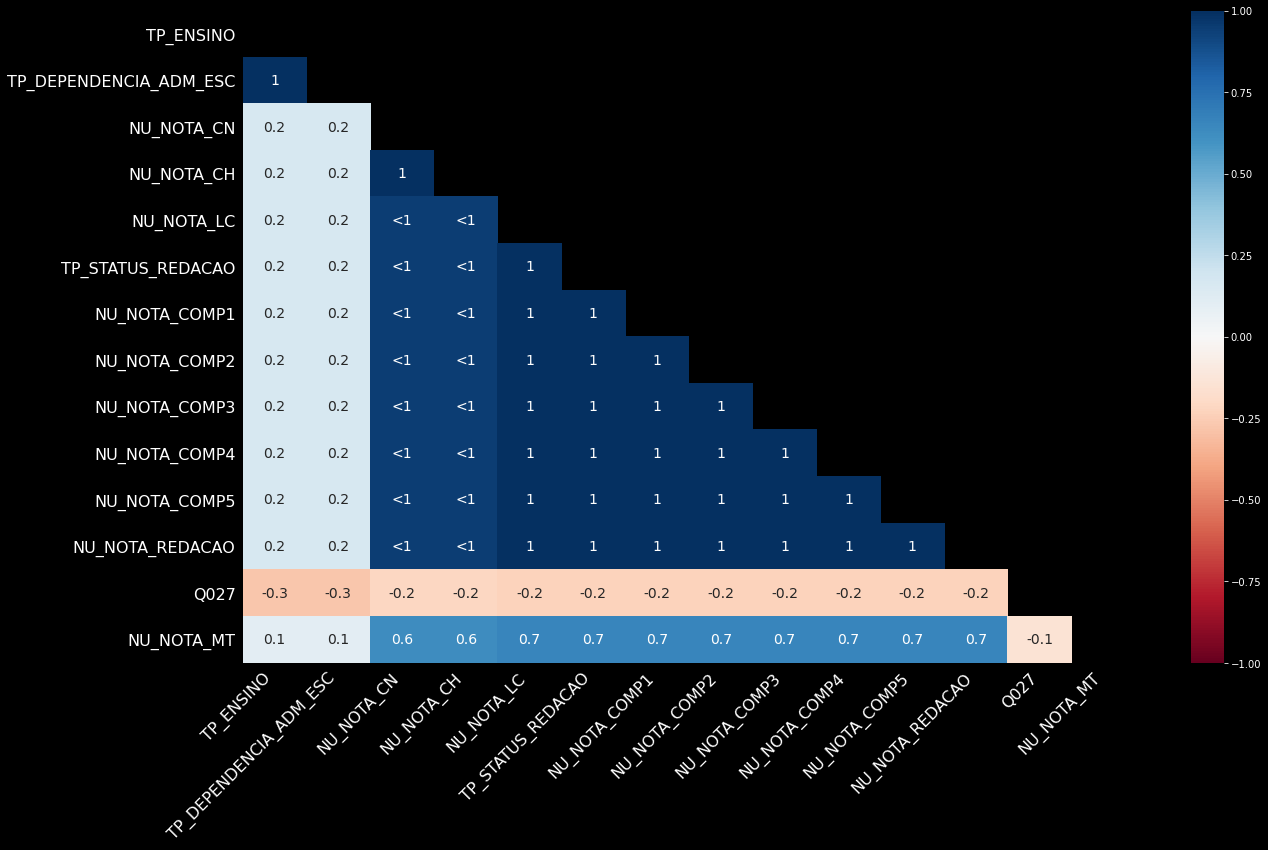

In [23]:
msno.heatmap(data[col_with_null])
plt.show()

In [24]:
msno.heatmap(data.query('train')[col_with_null])
plt.show()

#### Comparing when **'NU_NOTA_MT'** is null and **'NU_NOTA_LC'** is null

In [25]:
n = data.query('train')[['NU_NOTA_MT','NU_NOTA_LC']].isnull()

sum(~(n['NU_NOTA_MT'] == n['NU_NOTA_LC']))

0

#### Comparing when **'TP_DEPENDENCIA_ADM_ESC'** is null and **'TP_DEPENDENCIA_ADM_ESC'** is null

In [26]:
n = data.query('train')[['TP_DEPENDENCIA_ADM_ESC','TP_ENSINO']].isnull()

sum(~(n['TP_DEPENDENCIA_ADM_ESC'] == n['TP_ENSINO']))

0

#### Correlation between null values and other values

In [27]:
# Columns withou null values
cols_no_null = data.columns[data.isnull().sum() == 0]

# Data Frame with numeric non null columns
num = data[cols_no_null].select_dtypes(['float64', 'int64', 'bool'])

# Join two dataframes
left = ~data[col_with_null].isnull().astype('int64')
corr = pd.concat([left, num], axis = 1).query('train').corr() \
    .drop(col_with_null, axis = 1)\
    .drop(num.columns, axis = 0) # Drop null columns from one axis and drop numeric columsn from other axis

# Plot
plt.subplots(figsize=(14,6))
sns.heatmap(corr, annot = True, cmap="Blues")

plt.show()

In [28]:
train[train['NU_NOTA_MT'] == 0]

CO_UF_RESIDENCIA SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_COR_RACA  \
112                 43               RS        44       F            1   
430                 35               SP        17       F            1   
3443                21               MA        22       F            3   
3784                35               SP        19       M            1   
351                 35               SP        17       F            1   
2776                15               PA        18       F            3   
3020                26               PE        18       F            3   
3821                25               PB        21       M            2   
2502                26               PE        16       M            2   
4457                25               PB        23       M            1   

      TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  \
112                  1                4                0          1   
430                  1                2                0          3   
3443                 1                1                2          1   
3784                 1                1                1          1   
351                  1                2                0          2   
2776                 1                1                1          1   
3020                 1                2                0          2   
3821                 1                2                0          2   
2502                 1                3                0          1   
4457                 1                1                4          1   

      TP_ENSINO     ...      NU_NOTA_REDACAO  Q001  Q002  Q006  Q024  Q025  \
112         NaN     ...                  0.0     B     B     C     A     A   
430         1.0     ...                680.0     E     D     F     B     B   
3443        NaN     ...                  0.0     C     C     B     A     A   
3784        NaN     ...                360.0     H     H     B     B     A   
351         1.0     ...                540.0     H     D     B     A     A   
2776        NaN     ...                560.0     B     D     A     A     A   
3020        1.0     ...                500.0     D     E     C     A     A   
3821        1.0     ...                360.0     B     C     C     A     A   
2502        NaN     ...                340.0     C     E     A     A     A   
4457        NaN     ...                400.0     D     E     B     C     B   

      Q026  Q027  Q047  NU_NOTA_MT  
112      C     G     A         0.0  
430      A   NaN     E         0.0  
3443     A   NaN     A         0.0  
3784     A   NaN     A         0.0  
351      A   NaN     A         0.0  
2776     A   NaN     A         0.0  
3020     C     E     A         0.0  
3821     A   NaN     A         0.0  
2502     A   NaN     A         0.0  
4457     A   NaN     A         0.0  

[10 rows x 47 columns]

### Insights
* All null values coincide between **'NU_NOTA_MT' and 'NU_NOTA_LC'** since the two grades are of tests in the same day it can be considered that when 'NU_NOTA_LC' is null 'NU_NOTA_MT' will be null and all null values of 'NU_NOTA_MT' on the train set can be droped
* All null values also coincide between **'TP_DEPENDENCIA_ADM_ESC' and 'TP_ENSINO'**
* **'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC'** only say if the value is null so they don't have any use

### Transformations

In [29]:
# Select NU_NOTA_LC is not null
data = data[~data.NU_NOTA_LC.isnull()]

# Remove columns with no use
data.drop(['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC'], axis = 1, inplace = True)

print(data.shape)

(13510, 36)


### Plotting Data

#### Categorical data

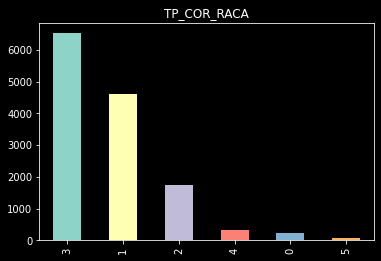

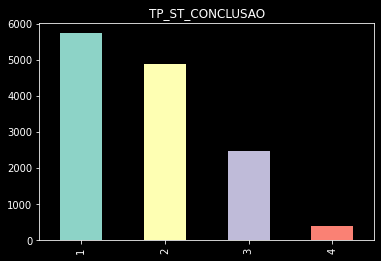

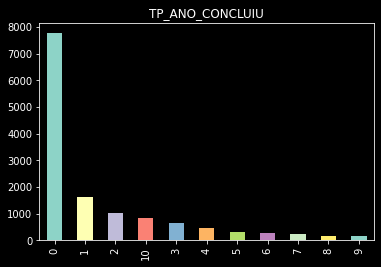

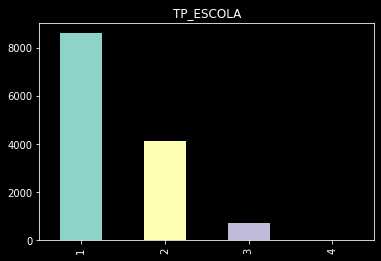

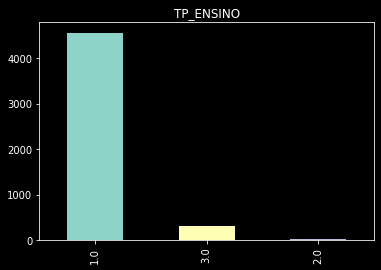

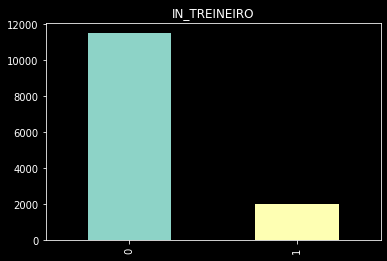

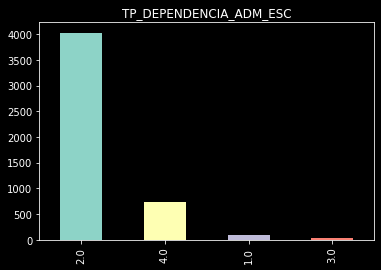

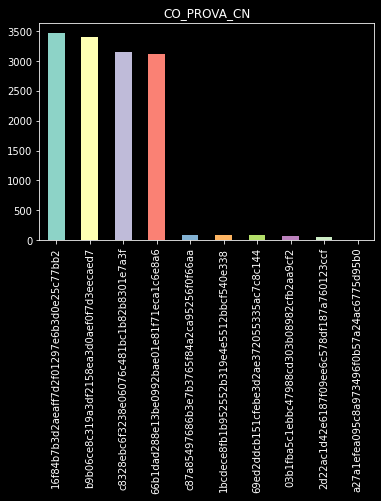

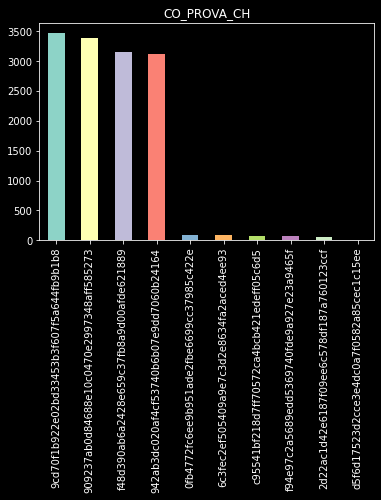

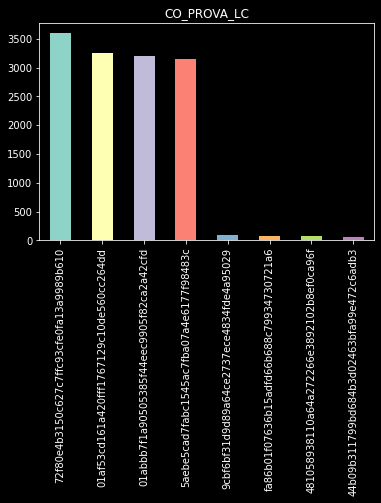

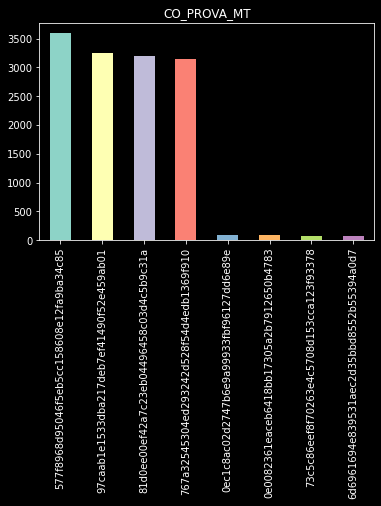

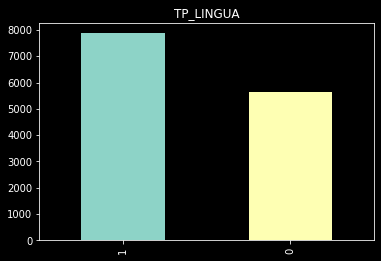

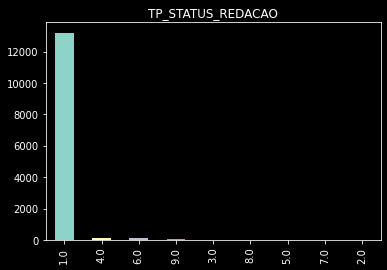

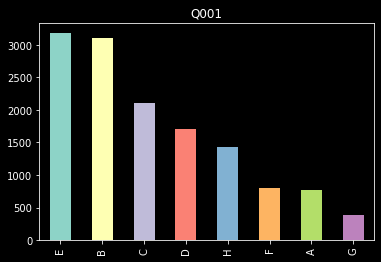

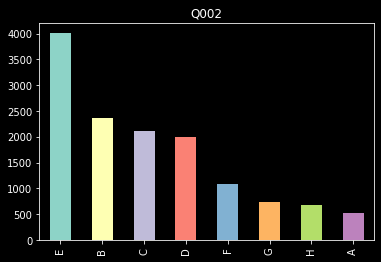

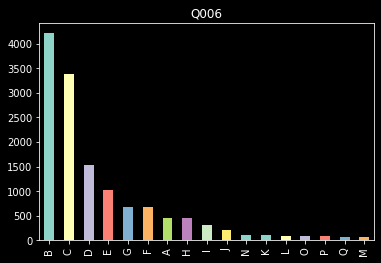

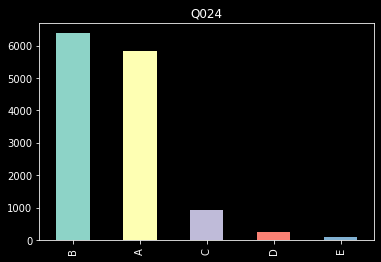

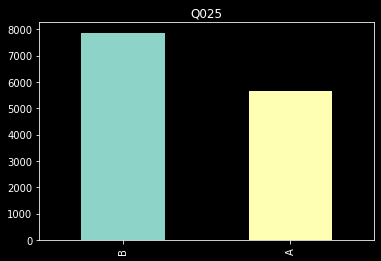

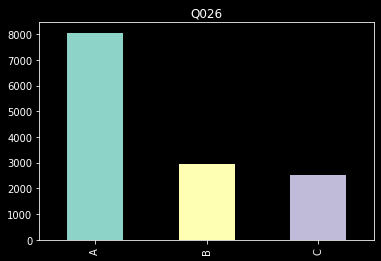

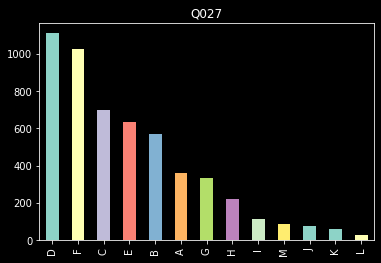

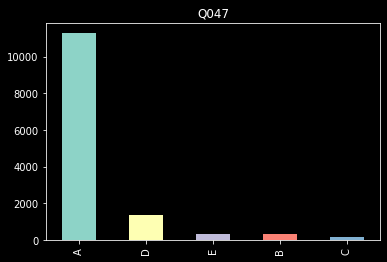

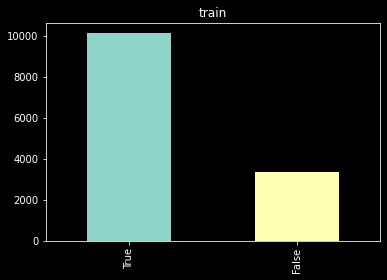

In [31]:
cols = data.columns[(data.nunique() <= 11) | (data.dtypes == 'object')]

for i in cols:
    data[i].value_counts().plot.bar(title = i)
    plt.show()

#### Numerical data

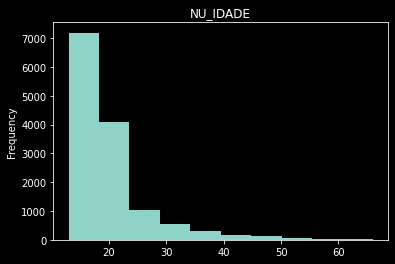

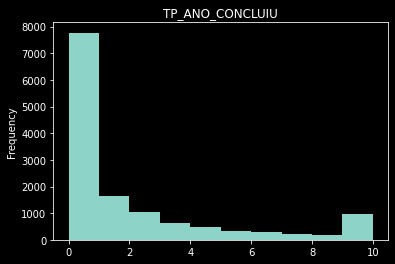

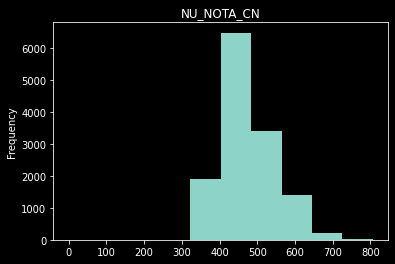

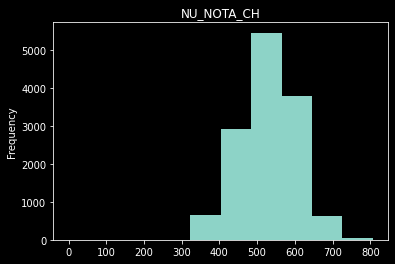

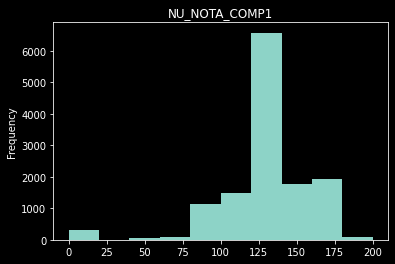

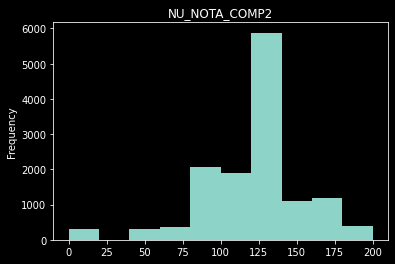

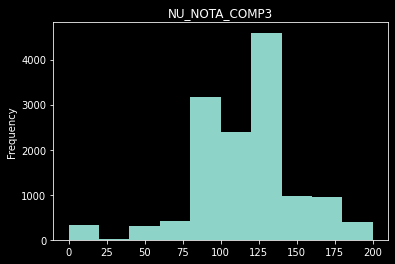

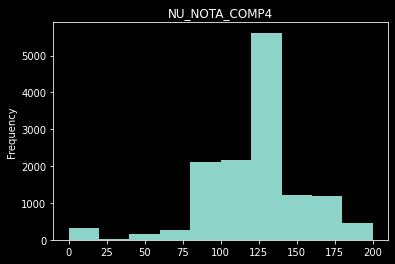

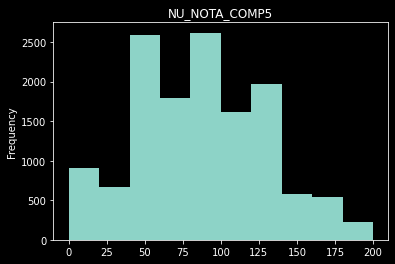

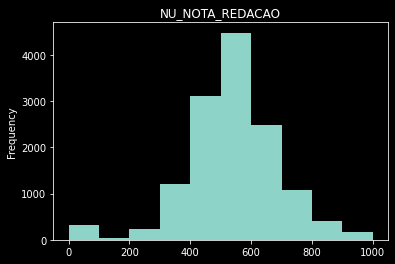

In [32]:
data_sel = data.select_dtypes(exclude=['object'])
cols = data_sel.columns[data_sel.nunique() > 10]

for i in cols:
    
    data[i].plot.hist(title = i)
    
    plt.show()

#### Categorical vs 'NU_NOTA_MT'

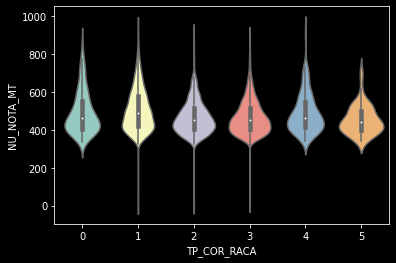

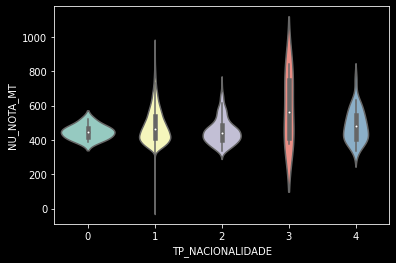

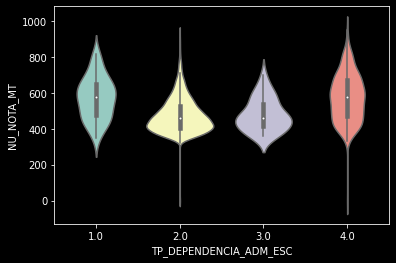

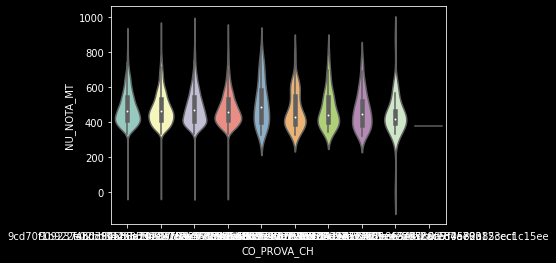

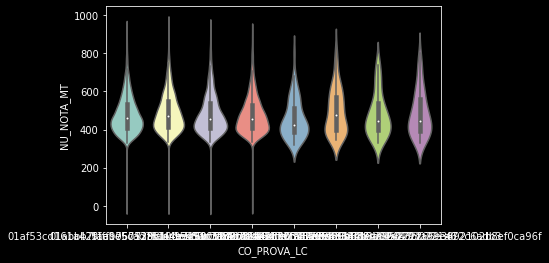

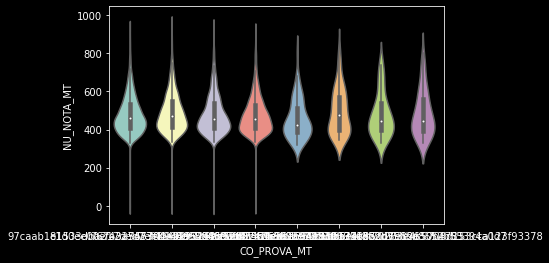

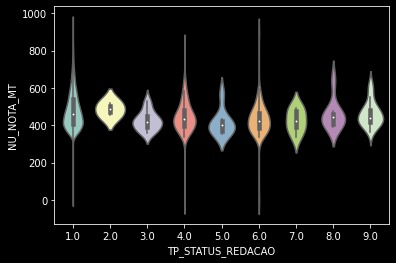

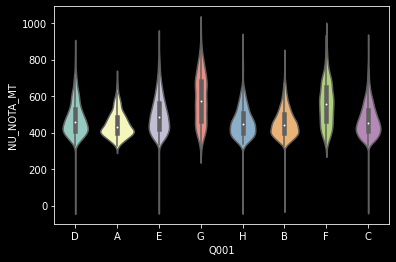

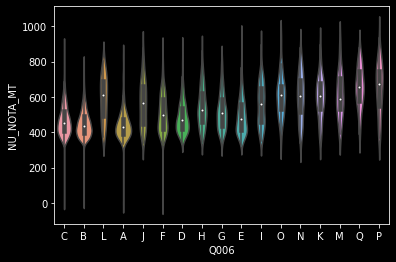

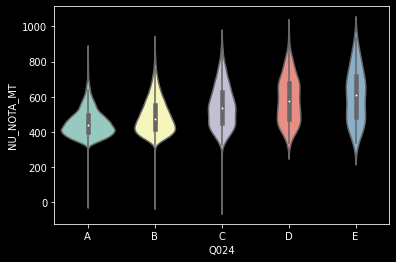

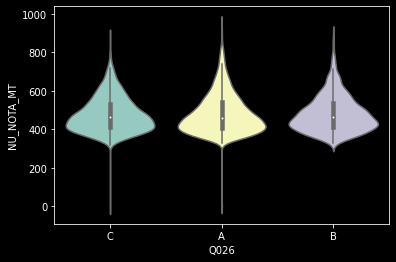

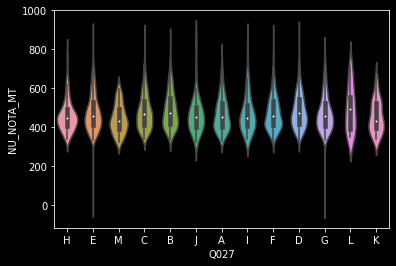

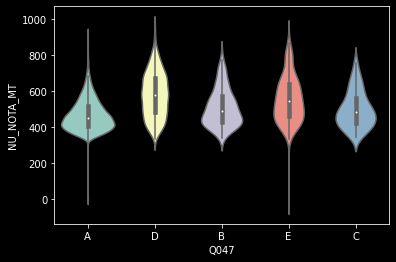

In [181]:
cols = data.columns[(data.nunique() <= 11) | (data.dtypes == 'object')]

for i in cols[:-1]:
    sns.violinplot(x = data[i], y = data.NU_NOTA_MT)
    plt.show()

#### Numerical vs 'NU_NOTA_MT'

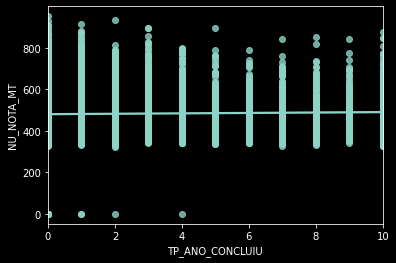

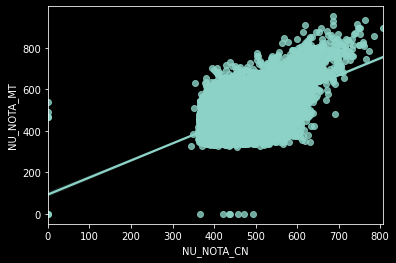

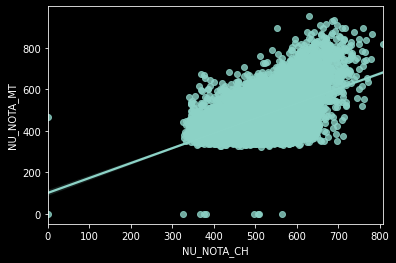

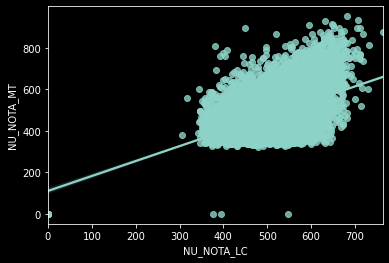

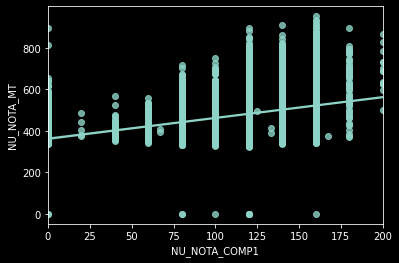

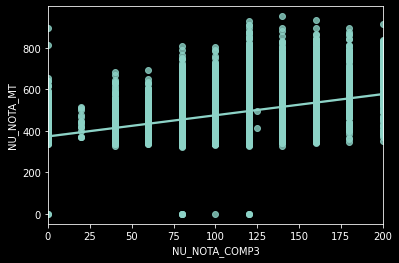

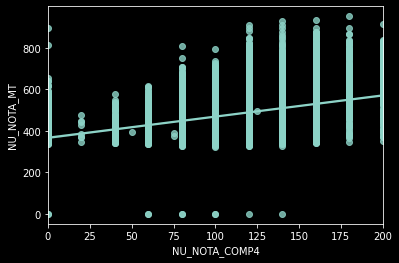

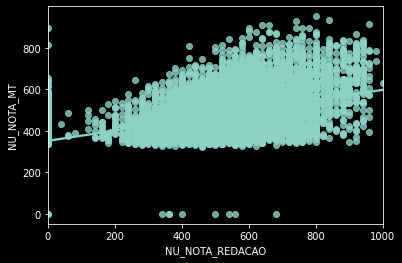

In [180]:
data_sel = data.select_dtypes(exclude=['object'])
cols = data_sel.columns[data_sel.nunique() > 10]

for i in cols[:-1]:

    sns.regplot(x = data[i], y = data.NU_NOTA_MT, )
    plt.show()

#### Numerical vs Numerical

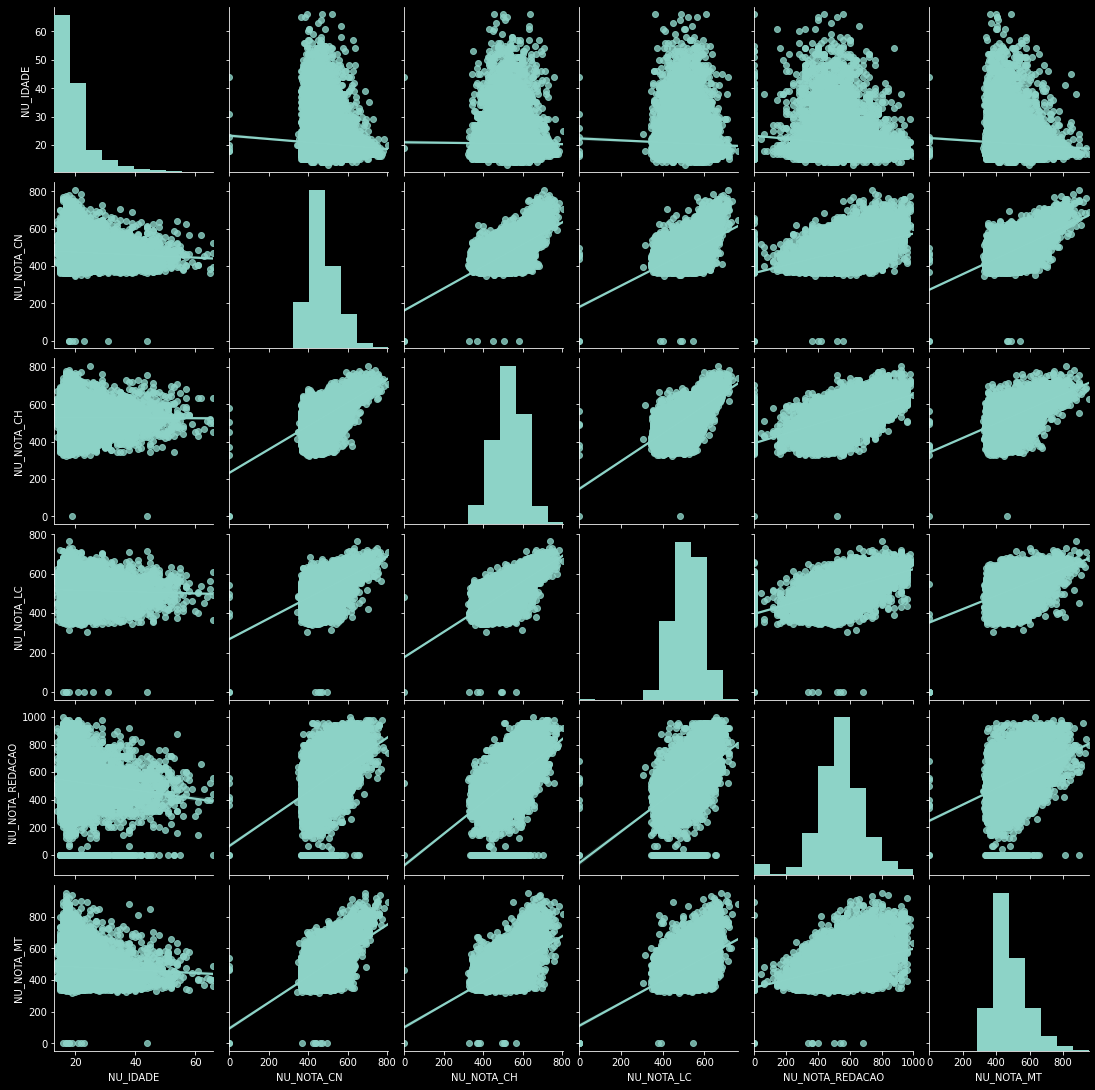

In [34]:
data_sel = data.select_dtypes(exclude=['object'])
cols = data_sel.columns[data_sel.nunique() > 16]

sns.pairplot(data[cols], kind = 'reg')

plt.show()

#### Numerical vs Categorical

#### Categorical vs Categorical

### Fill missing values

[]

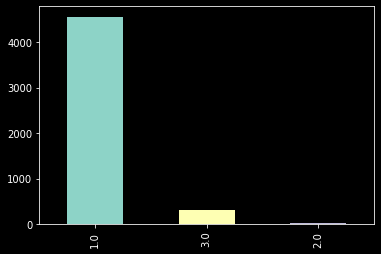

In [171]:
data.TP_ENSINO.value_counts().plot.bar()
plt.show()

[]

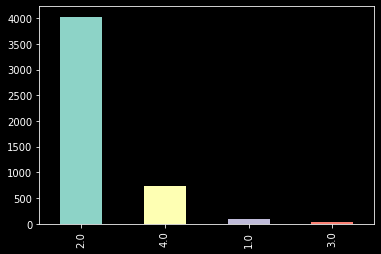

In [172]:
data.TP_DEPENDENCIA_ADM_ESC.value_counts().plot.bar()
plt.show()

[]

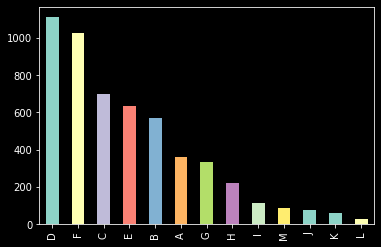

In [178]:
data.Q027.value_counts().plot.bar()
plt.plot()

In [35]:
data['TP_ENSINO_missing'] = data['TP_ENSINO'].isnull()
data['TP_ENSINO'].fillna(1, inplace = True)
data['TP_DEPENDENCIA_ADM_ESC_missing'] = data['TP_DEPENDENCIA_ADM_ESC'].isnull()
data['TP_DEPENDENCIA_ADM_ESC'].fillna(2, inplace = True)

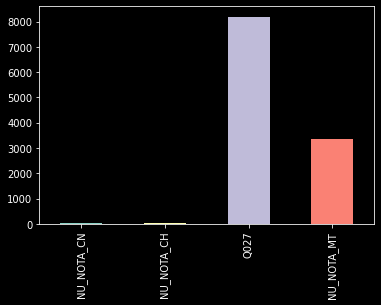

In [44]:
na_count = data.isnull().sum()
na_count[na_count > 0].plot.bar()

## Correlation

In [38]:
plt.subplots(figsize=(15,12))

corr = data.select_dtypes(['float64', 'int64', 'bool']).iloc[:,:-1].corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask = mask,annot = True, )

plt.show()

In [143]:
corr.unstack().sort_values().drop_duplicates()

TP_ST_CONCLUSAO         TP_ANO_CONCLUIU          -0.584949
TP_STATUS_REDACAO       NU_NOTA_COMP1            -0.579915
NU_NOTA_REDACAO         TP_STATUS_REDACAO        -0.493640
TP_STATUS_REDACAO       NU_NOTA_COMP4            -0.485735
                        NU_NOTA_COMP2            -0.477703
NU_NOTA_COMP3           TP_STATUS_REDACAO        -0.447674
TP_ANO_CONCLUIU         TP_ESCOLA                -0.417747
TP_ST_CONCLUSAO         NU_IDADE                 -0.297698
IN_TREINEIRO            TP_ESCOLA                -0.293194
                        NU_IDADE                 -0.288442
TP_ESCOLA               NU_IDADE                 -0.283512
TP_STATUS_REDACAO       NU_NOTA_COMP5            -0.257415
IN_TREINEIRO            TP_ANO_CONCLUIU          -0.248742
NU_NOTA_LC              TP_LINGUA                -0.242351
CO_UF_RESIDENCIA        TP_COR_RACA              -0.241309
NU_NOTA_CH              TP_LINGUA                -0.223781
NU_NOTA_CN              TP_LINGUA                -0.2180

### Predictive power score

In [48]:
pps_matrix = pps.matrix(
    data.dropna(subset=['NU_NOTA_CN', 'NU_NOTA_CH']).query('train').fillna('na')
    )

/Users/matheus/codenation/enem-2/venv-enem/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/Users/matheus/codenation/enem-2/venv-enem/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/Users/matheus/codenation/enem-2/venv-enem/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/Users/matheus/codenation/enem-2/venv-enem/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserW

In [52]:
plt.subplots(figsize=(17,15))

sns.heatmap(pps_matrix.iloc[:-3,:-3], vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

plt.show()

#### Biggest Correlations

In [87]:
pps_matrix.iloc[:-3,:-3].unstack().sort_values(ascending = False).drop_duplicates().head(20)

NU_NOTA_MT       NU_NOTA_MT                1.000000
CO_PROVA_CH      CO_PROVA_CN               0.999673
CO_PROVA_CN      CO_PROVA_CH               0.999672
TP_ESCOLA        TP_DEPENDENCIA_ADM_ESC    0.865386
TP_ST_CONCLUSAO  IN_TREINEIRO              0.855019
                 TP_ESCOLA                 0.833478
Q024             Q025                      0.677316
NU_IDADE         IN_TREINEIRO              0.677000
                 TP_ST_CONCLUSAO           0.627441
TP_ANO_CONCLUIU  TP_ST_CONCLUSAO           0.599738
NU_NOTA_COMP3    NU_NOTA_REDACAO           0.596902
TP_ESCOLA        TP_ST_CONCLUSAO           0.594332
NU_NOTA_COMP2    NU_NOTA_REDACAO           0.581788
NU_NOTA_COMP4    NU_NOTA_REDACAO           0.564849
Q027             Q026                      0.560193
Q025             Q024                      0.553287
NU_NOTA_COMP2    TP_STATUS_REDACAO         0.520350
NU_NOTA_COMP1    TP_STATUS_REDACAO         0.512542
NU_NOTA_COMP4    TP_STATUS_REDACAO         0.500896
NU_NOTA_COMP

* **IN_TREINEIRO** is a subcase of TP_ST_CONCLUSAO equal to 3 so its not of much use

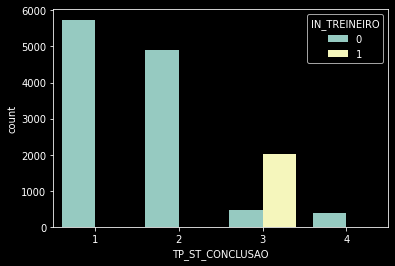

In [61]:
sns.countplot(data = data, x = 'TP_ST_CONCLUSAO', hue = 'IN_TREINEIRO')
plt.show()

* **'CO_PROVA_CN' and 'CO_PROVA_CN'** are the same variable with different labels

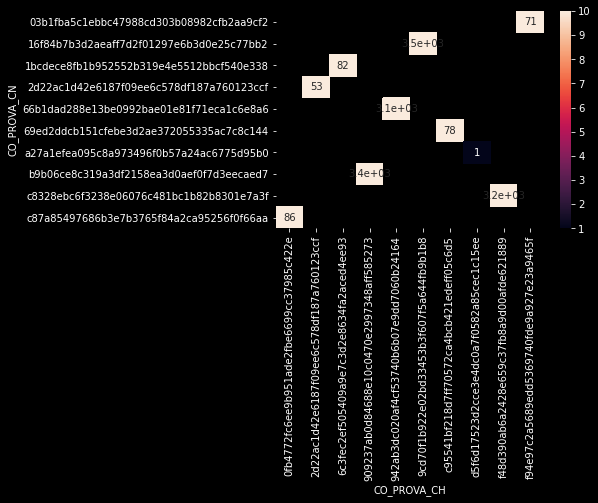

In [83]:
sns.heatmap(
    data[['CO_PROVA_CN', 'CO_PROVA_CH']].groupby(by = ['CO_PROVA_CN', 'CO_PROVA_CH']).size().unstack(), vmax=10, annot = True
)

plt.show()

* **TP_ESCOLA** is just a a subcase of **TP_DEPENDENCIA_ADM_ESC** so the variable can be discarded

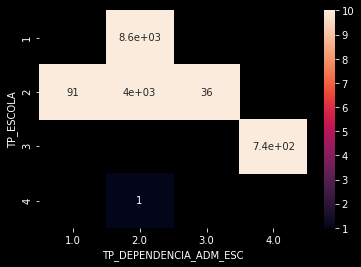

In [88]:
keys = ['TP_ESCOLA', 'TP_DEPENDENCIA_ADM_ESC']

sns.heatmap(
    data[keys].groupby(by = keys).size().unstack(), vmax=10, annot = True
)

plt.show()

* Every one who marked to be still be studying didn't left blank the question to what kind of school they studied in

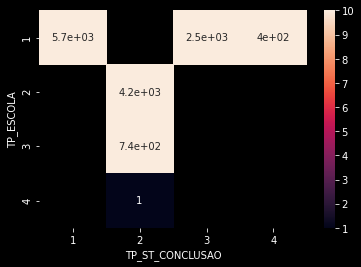

In [89]:
keys = ['TP_ESCOLA', 'TP_ST_CONCLUSAO']

sns.heatmap(
    data[keys].groupby(by = keys).size().unstack(), vmax=10, annot = True
)

plt.show()

#### Transformations

In [101]:
data.drop(['TP_ESCOLA', 'CO_PROVA_CN', 'IN_TREINEIRO'], axis = 1, inplace = True)

print(data.shape)

(13510, 35)


### Clustering

In [108]:
km = KMeans(n_clusters = 5)

In [169]:
clusters = km.fit_predict(
    data.dropna(subset=['NU_NOTA_CN', 'NU_NOTA_CH']).query('train').select_dtypes(include = ['float64', 'int64', 'bool'])
    )

### PCA

In [113]:
from sklearn.decomposition import PCA

In [114]:
pca = PCA()

In [115]:
pca_comp = pca.fit_transform(
    data.dropna(subset=['NU_NOTA_CN', 'NU_NOTA_CH']).query('train').select_dtypes(include = ['float64', 'int64', 'bool'])
)

In [126]:
print('Explained Variance: ', np.cumsum(pca.explained_variance_ratio_)[:5])

Explained Variance:  [0.66155295 0.83956336 0.90680869 0.94676727 0.97428296]


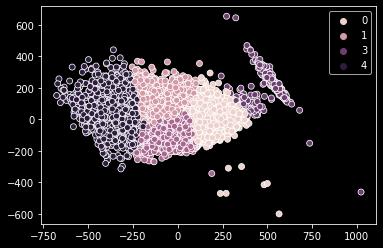

In [124]:
sns.scatterplot(x = pca_comp[:,0], y = pca_comp[:,1], hue = clusters)

plt.show()

### T-SNE

In [127]:
from sklearn.manifold import TSNE

In [128]:
tsne = TSNE()

In [170]:
tsne_comp = tsne.fit_transform(
    data.dropna(subset=['NU_NOTA_CN', 'NU_NOTA_CH']).query('train').select_dtypes(include = ['float64', 'int64', 'bool'])#.query('NU_NOTA_REDACAO != 0')
)

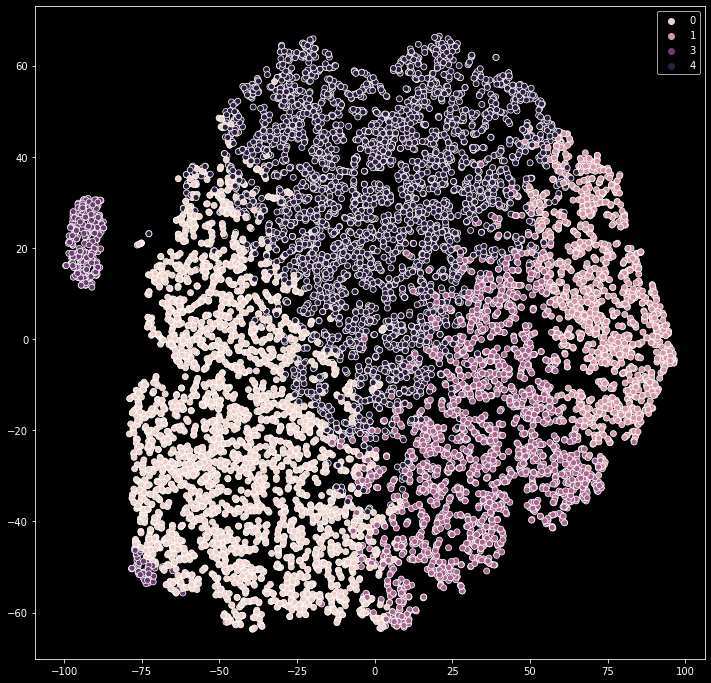

In [171]:
plt.subplots(figsize=(12,12))

sns.scatterplot(x = tsne_comp[:,0], y = tsne_comp[:,1], 
                hue = clusters,
            
               )

plt.show()

In [172]:
d =  data.dropna(subset=['NU_NOTA_CN', 'NU_NOTA_CH']).query('train').select_dtypes(include = ['float64', 'int64', 'bool'])#.query('NU_NOTA_REDACAO != 0')


In [173]:
sns.distplot(d[clusters == 3]['NU_NOTA_MT'])

In [178]:
d[(clusters == 3)&(tsne_comp[:,1] < 0)]

NU_IDADE  TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  \
257         17            3                 1                3   
311         17            3                 1                2   
313         48            1                 1                4   
399         19            3                 1                3   
655         18            3                 1                2   
680         18            3                 1                3   
696         25            2                 1                1   
1911        31            2                 1                1   
2046        20            3                 1                2   
2591        18            2                 1                1   
2680        19            3                 1                2   
2690        18            1                 1                3   
2757        19            2                 1                1   
2857        17            3                 1                3   
2919        31            2                 1                1   
3148        16            3                 1                3   
3763        16            3                 1                3   
3963        18            0                 0                2   
4043        17            3                 1                2   
4498        38            3                 4                1   
294         17            2                 1                2   
406         38            3                 1                2   
445         16            3                 1                2   
473         19            1                 1                2   
508         18            3                 1                2   
819         20            2                 1                3   
1348        50            1                 1                1   
1712        27            3                 1                2   
1958        17            2                 1                2   
2195        52            3                 1                1   
2285        61            2                 1                1   
2437        27            3                 1                2   
2483        20            3                 1                2   
2533        18            1                 1                2   
2563        36            3                 1                4   
2608        19            3                 1                2   
2726        22            1                 1                1   
3375        39            1                 1                1   
3698        33            3                 1                1   
3883        19            3                 1                1   
3963        19            3                 1                3   
583         20            2                 1                3   
688         16            3                 1                3   
712         46            3                 1                1   
943         26            0                 1                1   
1165        18            3                 1                2   
1550        54            1                 1                4   
1778        17            3                 1                2   
1959        18            1                 1                1   
2067        20            3                 1                1   
2294        19            3                 1                2   
2691        18            3                 1                2   
3242        22            3                 1                1   
3572        20            3                 2                3   
3640        27            1                 1                4   
3727        19            1                 1                3   
3837        19            1                 1                1   
3890        23            2                 1                1   
4036        20            3                 1                1   
4377        19            1                 1 

In [182]:
data.columns

Index(['SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ENSINO',
       'TP_DEPENDENCIA_ADM_ESC', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047', 'NU_NOTA_MT', 'train',
       'TP_ENSINO_missing', 'TP_DEPENDENCIA_ADM_ESC_missing'],
      dtype='object')